In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import color_palette

In [2]:
netflix_df=pd.read_csv('C:/Users/JAMO/Desktop/project/netflix data using pandas and matplotlib/netflix_titles.csv')

In [3]:
# Dimensions of dataset(rows,columns)
netflix_df.shape

(8807, 12)

In [4]:
# Display 5 random rows from the netflix dataseet to inspect sample entries
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6077,s6078,Movie,Abdo Mota,NaN,Mohamed Ramadan,Egypt,"April 19, 2019",2012,TV-MA,100 min,"Action & Adventure, Dramas, International Movies","Following the mysterious death of his parents,..."
4996,s4997,Movie,Bullet Head,"Paul Solet, Rick Benattar","Adrien Brody, John Malkovich, Rory Culkin, Ant...","Bulgaria, United States","March 7, 2018",2017,R,94 min,"International Movies, Thrillers","After a daring heist, three fugitives lock the..."
3298,s3299,TV Show,Wild District,NaN,"Juan Pablo Raba, Cristina Umaña, Camila Sodi, ...",Colombia,"November 8, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...","After surrendering to Bogotá police, an ex-gue..."
3781,s3782,Movie,Krutant,Datta Mohan Bhandare,"Suyog Rajendra Gorhe, Sandeep Kulkarni, Vidya ...",India,"June 2, 2019",2019,TV-14,114 min,"Dramas, International Movies",When a busy workaholic leaves town to meet fri...
7424,s7425,Movie,May We Chat,Philip Yung,"Irene Wan, Peter Mak, Rainky Wai, Heidi Lee, K...",Hong Kong,"August 26, 2018",2014,TV-MA,99 min,"Dramas, International Movies","A messaging app unites a mute prostitute, an u..."


In [5]:
# Check for missing(null) values in each column of the dataset
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Display the data type of each column in the dataset
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
# Generate summary statistics for numerical column in the dataset
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
# Define a function to split comma-seperated values in a column, normalize to lowercase
# Count the frequency of each unique item, and return the top 'value' most common ones
def split_and_count(df,name,value):
    result=df[name].str.lower().str.split(', ').explode().str.strip().value_counts().head(value)
    return result

In [9]:
# Define a function to add a title,axis labels, legend, and optional grid to a matplotlib plot
def add_plot_labels(title,xlable,ylable,legend,grid):
    plt.title(title,fontsize=14,fontweight='bold')
    plt.xlabel(xlable,fontsize=12)
    plt.ylabel(ylable,fontsize=12)
    plt.legend(title=legend)
    if grid:
        plt.grid(color='gray',linestyle='--',linewidth=0.5,alpha=0.7)

In [10]:
# Define a function to plot a bar chart with custom size, data, title, and axis labels
def plot_bar_chart(x_size,y_size,df,p,title,xlable,ylable):
    plt.figure(figsize=(x_size,y_size))
    sns.barplot(x=df.index,y=df.values,palette=p)
    plt.title(title,fontsize=14,fontweight='bold')
    plt.xlabel(xlable,fontsize=12)
    plt.ylabel(ylable,fontsize=12)
    plt.show()

In [11]:
# Define a function to compare two bar charts side by side for movies and TV shows
# The function takes data for both charts, color palettes, and titles for each plot
def compare_two_bar_charts(x1,y1,x2,y2,p1,p2,movie_title,tv_show_title):
    fig,ax=plt.subplots(1,2,figsize=(15,5)) # create a subplot with 2 charts side by side
    sns.barplot(x=x1,y=y1,ax=ax[0],palette=p1) # plot the first bar chart for movies
    ax[0].set_title(movie_title,fontsize=14,fontweight='bold') # set title for the first chart
    sns.barplot(x=x2,y=y2,ax=ax[1],palette=p2) # plot the second bar chart for TV shows
    ax[1].set_title(tv_show_title,fontsize=14,fontweight='bold') # set title for the second chart
    plt.tight_layout() # Adjust layout for better spacing
    plt.show()

In [12]:
# Drop rows with missing values in the 'duration' column
netflix_df=netflix_df.dropna(subset=['duration'])
# Create a mask to filter only the rows where 'type' is 'Movie'
movie_mask=netflix_df['type']=='Movie'
# Extract the numeric duration (in minutes) from the 'duration' column for movies
# This assumes the duration is in the format "X min" and we extract only the number
netflix_df.loc[movie_mask,'duration']=(
    netflix_df.loc[movie_mask,'duration']
    .astype(str)
    .str.extract('(\d+)')[0] # Extract numeric part of the duration
)
# convert the extracted duration to numeric, coercing errors (e.g: non-numeric values) to NaN
netflix_df.loc[movie_mask,'duration']=pd.to_numeric(netflix_df.loc[movie_mask,'duration'],errors='coerce')
# Create seperate DataFrames for TV shows and movies
tv_shows=netflix_df[netflix_df["type"]=="TV Show"].copy()
movies=netflix_df[netflix_df["type"]=="Movie"].copy()

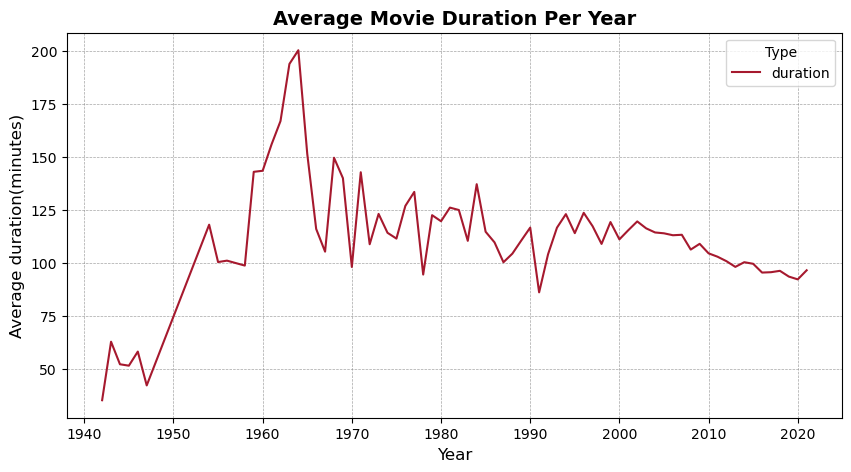

In [13]:
# Calculate the average movie duration per year by grouping by 'release_year' and taking the mean of 'duration'
avg_duration_per_year=movies.groupby('release_year')['duration'].mean().sort_index()
# Create a plot with custom figure size
plt.figure(figsize=(10,5))
# plot the average movie duration per year with a custom color
avg_duration_per_year.plot(color='#A6192E')
#Add labels and a title to the plot, with grid enabled
add_plot_labels('Average Movie Duration Per Year','Year','Average duration(minutes)','Type',True)
plt.show()

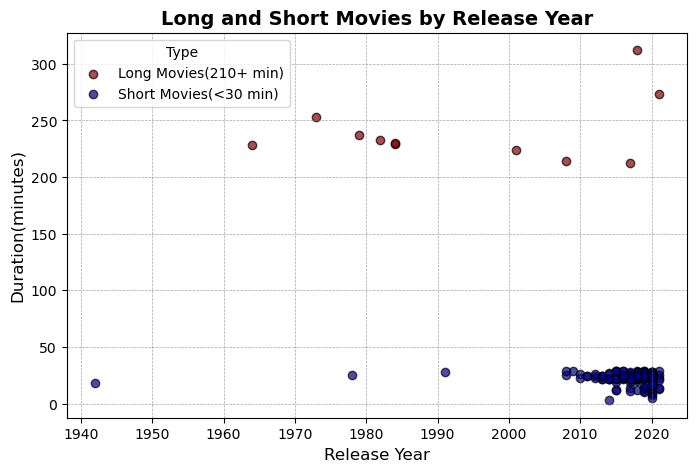

In [14]:
# Filter movies based on duration
# 'long_movies' are those with duration greater that or equal to 210 minutes
# 'Short_movies' are those with duration less that 30 minutes
long_movies=movies[movies['duration']>=210]
short_movies=movies[movies['duration']<30]
# Create a scatter plot to visualize long and short movies by release year and duration
plt.figure(figsize=(8,5))
# plot long movies with dark red color and labels
plt.scatter(long_movies['release_year'],long_movies['duration'],color='darkred',alpha=0.7,edgecolor='black',label='Long Movies(210+ min)')
# Plot short movies with dark blue color and labels
plt.scatter(short_movies['release_year'],short_movies['duration'],color='darkblue',alpha=0.7,edgecolor='black',label='Short Movies(<30 min)')
# Add labels, title, and grid to the plot
add_plot_labels('Long and Short Movies by Release Year','Release Year','Duration(minutes)','Type',True)
# Adjust tick font size for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [15]:
# Filter the 'long_movies' DataFrame to find movies with a duration greater than 300 minutes
longest_movie=long_movies[long_movies['duration']>300]
# Display the longest movies (greaater than 300 minutes)
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [16]:
# Convert 'duration' values of movies to numeric, coercing error to NaN for invalid entries
numeric_mask=pd.to_numeric(netflix_df.loc[movie_mask,'duration'],errors='coerce')
# For movies with duration greater than 300 minutes, set their 'duration' to 90 minutes (adjusting unrealistic values)
netflix_df.loc[movie_mask & (numeric_mask>300),'duration']=90
# For movies with duration less than 30 minutes, label them as 'short movie' instead of 'movie'
netflix_df.loc[movie_mask & (numeric_mask<30),'type']="Short Movie"
# update the 'movies' DataFrame wiht movies thatare still labeled as 'Movie'
movies=netflix_df[netflix_df["type"]=="Movie"].copy()
#update the 'short_movies' DataFrame with movies that are now labeled as 'short movie'
short_movies=netflix_df[netflix_df["type"]=="Short Movie"].copy()

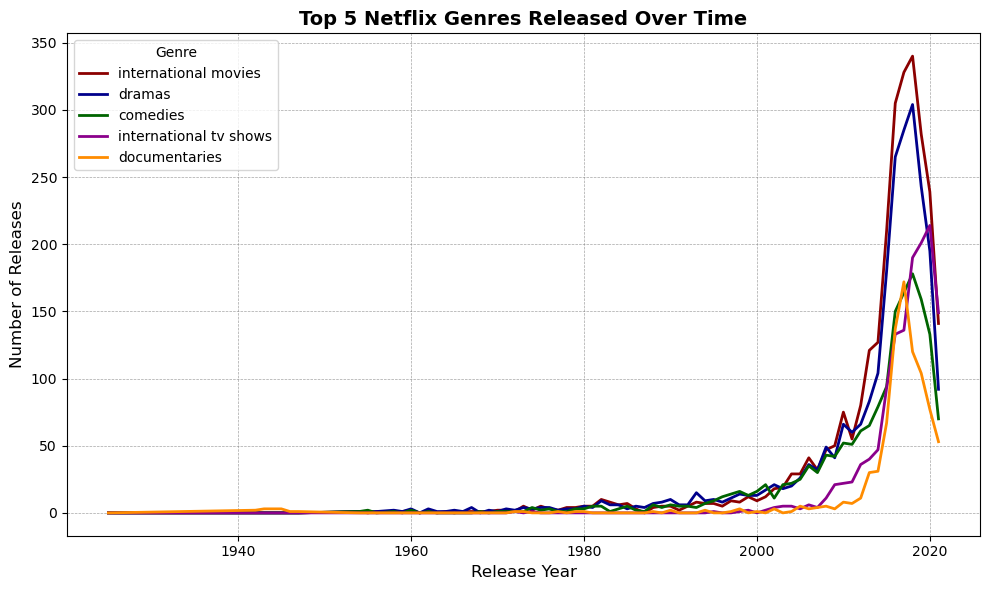

In [17]:
palette=["darkred","darkblue","darkgreen","darkmagenta","darkorange"]
# Create a new DataFrame with 'release_year' and 'listed_in' columns
genre_year_df=netflix_df[['release_year','listed_in']].copy()
# Split the 'listed_in' column into seperate genres, and exand into multiple rows per genre
genre_year_df=genre_year_df.assign(genre=genre_year_df['listed_in'].str.split(',')).explode('genre')
# Clean up the 'genre' column by stripping whitespace and converting to lower case
genre_year_df['genre']=genre_year_df['genre'].str.strip().str.lower()
# Count the occurences of each genre per year
genre_counts=genre_year_df.groupby(['release_year','genre']).size().unstack(fill_value=0)
# Get the top 5 genres with the most releases, sorted by total releases across all years
top_genres=genre_counts.sum().sort_values(ascending=False).head(5)
# plot the top 5 genres released over time with custome color and line thickness
genre_counts[top_genres.index].plot(figsize=(10,6),linewidth=2,color=palette)
# Add plot labels and title, with grid enabled
add_plot_labels("Top 5 Netflix Genres Released Over Time","Release Year","Number of Releases","Genre",True)
# Adjust the layout for better spacing and display the plot
plt.tight_layout()
plt.show()

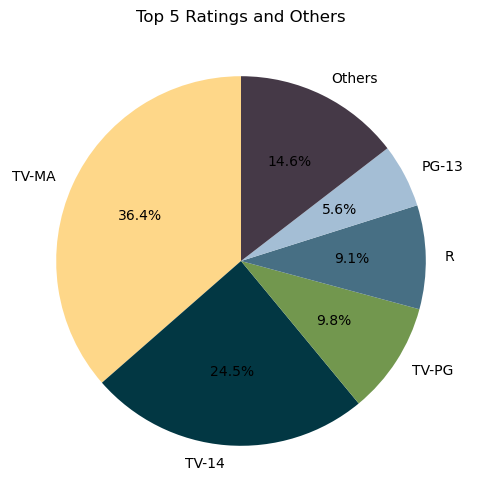

In [18]:
colors=["#FED789FF","#023743FF","#72974EFF","#476F84FF","#A4BED5FF","#453947FF"]
# Get the top 5 most frequent rating from the 'rating' column
top_5_ratings=netflix_df['rating'].value_counts().head(5)
# calculate the count of all other rating that are not in the top 5
others_count=netflix_df['rating'].value_counts().sum()-top_5_ratings.sum()
# Combain the top 5 rating with the 'others' category for the pie chart
top_5_ratings_with_others=pd.concat([top_5_ratings,pd.Series({'Others':others_count})])
# Create a pie chart to visualize the distribution of the top 5 ratings and others
plt.figure(figsize=(10,6))
plt.pie(top_5_ratings_with_others,labels=top_5_ratings_with_others.index,autopct='%1.1f%%',startangle=90,colors=colors)
plt.title('Top 5 Ratings and Others')
plt.show()

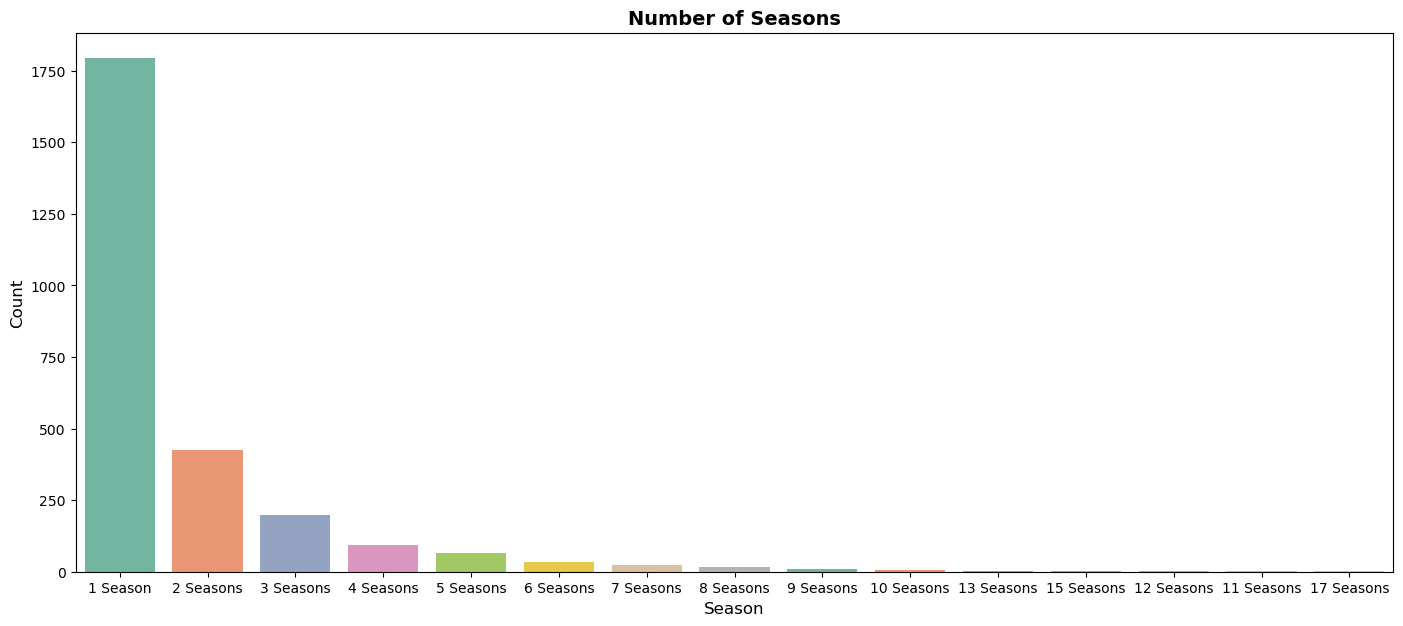

In [19]:
# Count the occurences of each unique 'duration' (number of seasons) in the TV shows dataset
tv_show_seasons = tv_shows['duration'].value_counts()
# Plot a bar chart for the number of seasons in TV shows, using the 'set2' color palette
plot_bar_chart(17,7,tv_show_seasons,'Set2','Number of Seasons','Season','Count')

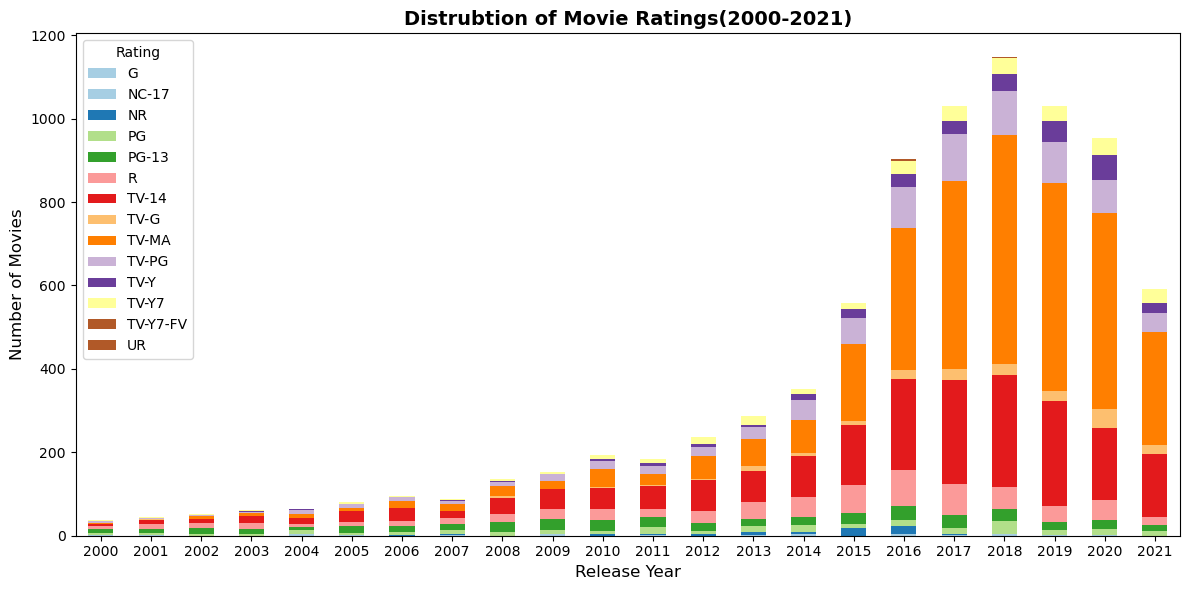

In [20]:
# Group by 'release_year' and count the occurrences of each rating per year, then unstack to have rating as a seperate column
rating_per_year=netflix_df.groupby('release_year')['rating'].value_counts().unstack(fill_value=0)
# Filter data to only include years from 2000 onwards
rating_per_year=rating_per_year[rating_per_year.index>1999]
# Plot a stacked bar chart to show the distribution of movie rating from 2000 to 2021
rating_per_year.plot(kind='bar',stacked=True,figsize=(12,6),colormap='Paired')
# Add labels, title, and disable the grid
add_plot_labels('Distrubtion of Movie Ratings(2000-2021)','Release Year','Number of Movies','Rating',False)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

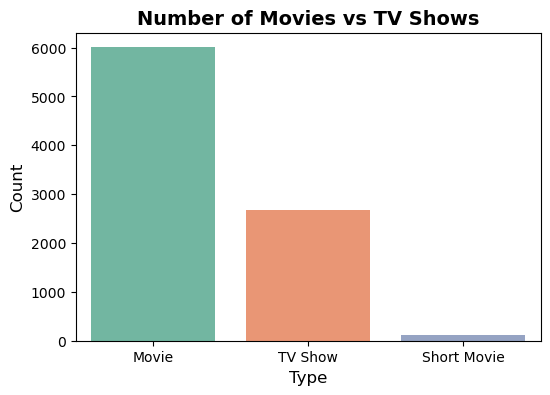

In [21]:
# Count the occurrences of each unique alues in the 'type' column (movies vs TV shows)
type_counts=netflix_df['type'].value_counts()
# plot a bar chart to compare the number of movies vs TV shows using the 'set2' color palette
plot_bar_chart(6,4,type_counts,'Set2','Number of Movies vs TV Shows','Type','Count')

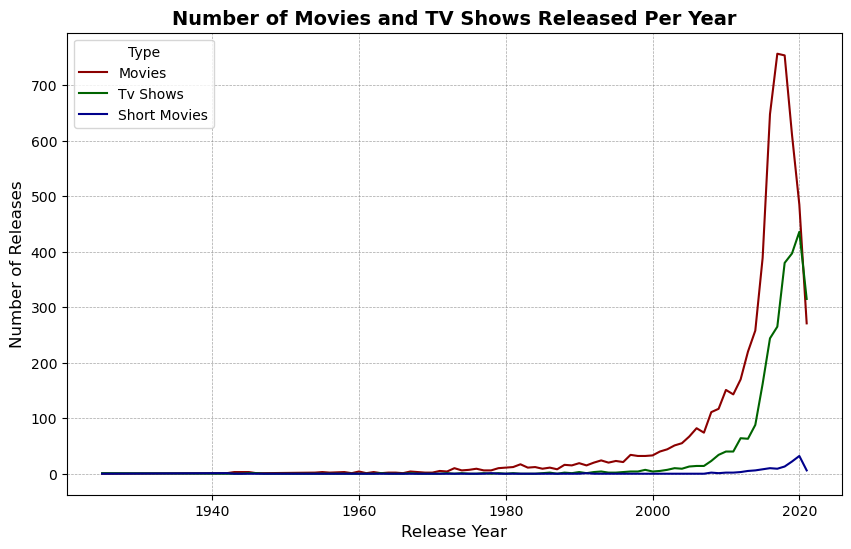

In [22]:
# Group the data by 'release_year' and 'type'(movies,TV shows,short movies), then the occurrences
content_counts=netflix_df.groupby(['release_year','type']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
# Plot the number of movies released each year
plt.plot(content_counts.index,content_counts['Movie'],linestyle='-',color='darkred',label='Movies')
# Plot the number of TV shows released each year
plt.plot(content_counts.index,content_counts['TV Show'],linestyle='-',color='darkgreen',label='Tv Shows')
# Plot the number of short movies released each year
plt.plot(content_counts.index,content_counts['Short Movie'],linestyle='-',color='darkblue',label='Short Movies')
# Add plot labels and title, with grid enabled for better readability
add_plot_labels('Number of Movies and TV Shows Released Per Year','Release Year','Number of Releases',"Type",True)
plt.show()

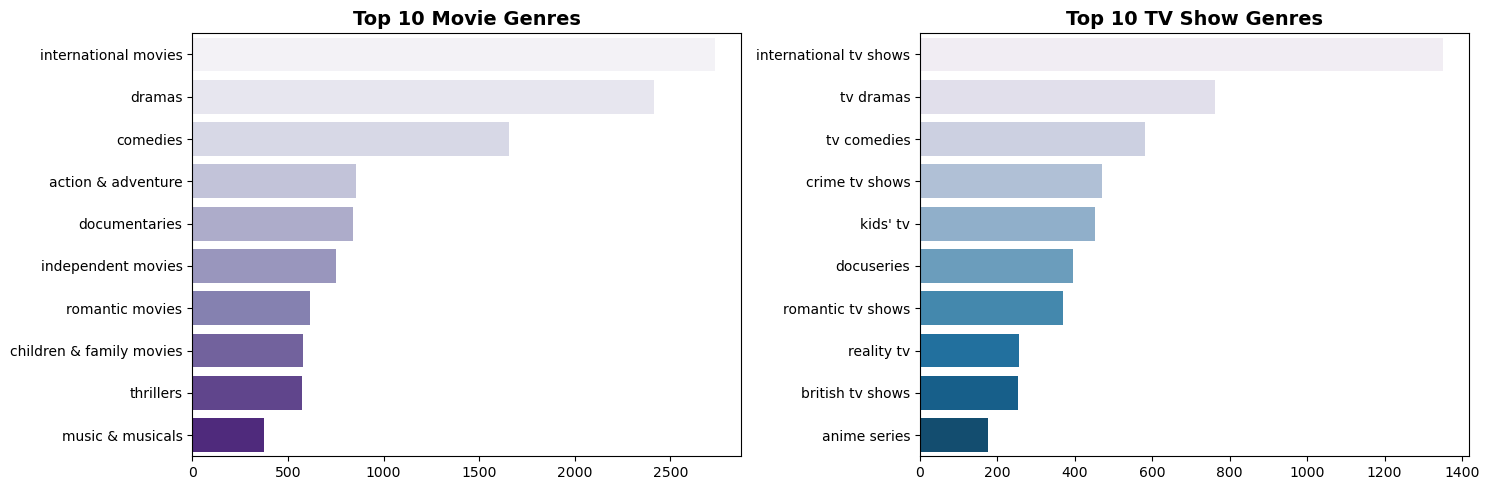

In [23]:
# Get the top 10 movies genres by splitting the 'listed_in' column and counting occurrences
movie_genres=split_and_count(movies,'listed_in',10)
# Get the top 10 TV show genres by splitting the 'listed_in' column and counting occurrences
tv_show_genres=split_and_count(tv_shows,'listed_in',10)
# Compare the top 10 movies genres and top 10 TV show genres using a side-by-side chart
compare_two_bar_charts(movie_genres.values,movie_genres.index,tv_show_genres.values,tv_show_genres.index,'Purples','PuBu','Top 10 Movie Genres','Top 10 TV Show Genres')

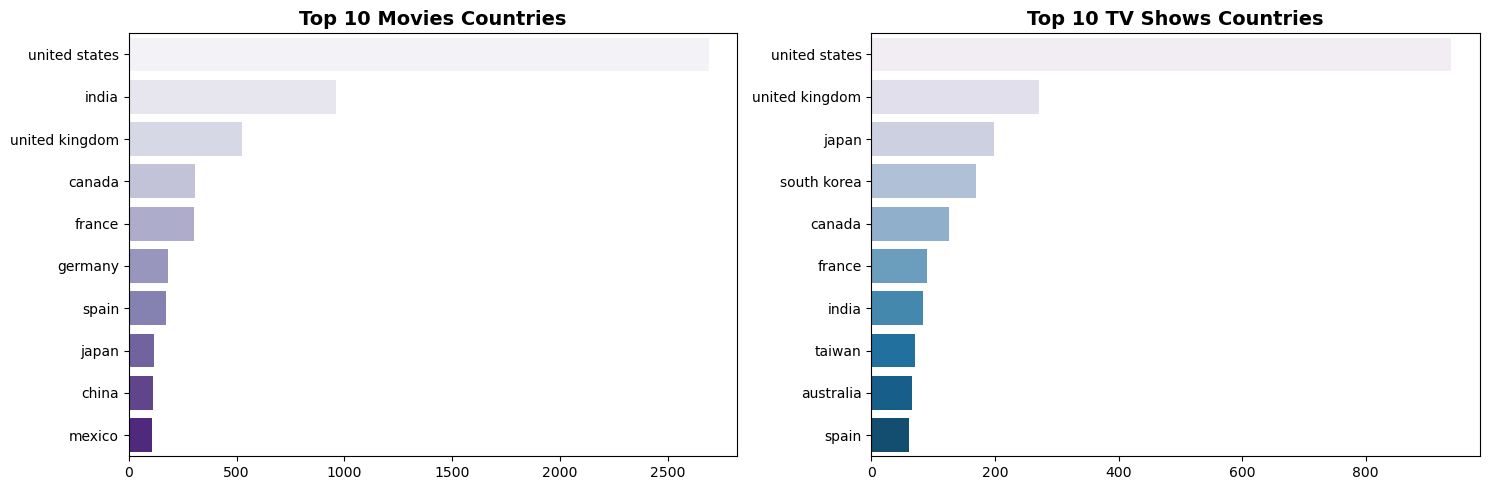

In [24]:
# Get the top 10 countries where movies were produced by splitting the 'country' column and counting occurrences
movie_countries=split_and_count(movies,'country',10)
# Get the top 10 countries where TV shows were produced by splitting the 'country' column and counting occurrences
tv_show_countries=split_and_count(tv_shows,'country',10)
# Compare the top 10 movie-producing countries and top 10 TV show=producing countries using a side-by-side bar chart
compare_two_bar_charts(movie_countries.values,movie_countries.index,tv_show_countries.values,tv_show_countries.index,'Purples','PuBu','Top 10 Movies Countries','Top 10 TV Shows Countries')

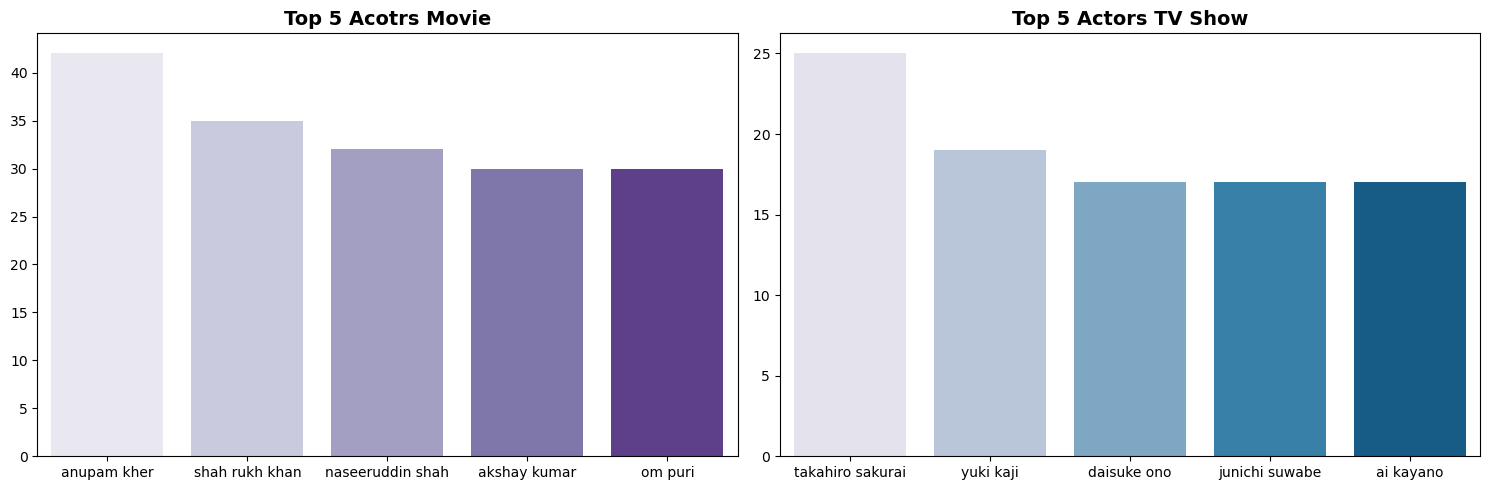

In [25]:
# Define coustom color for future plots (not directly used here but could be resused later)
colors=["#D57A6DFF","#E8B762FF","#9CCDDFFF","#525052FF"]
# Get the top 5 most frequently actors in movies by splitting the 'cast' column and counting occurrences
movie_actors=split_and_count(movies,'cast',5)
# Get the top 5 most frequent actors in TV shows by splitting the 'cast' columns and counting occurrences
tv_show_actors=split_and_count(tv_shows,'cast',5)
# Compare the top 5 actors in movies and TV shows using a side-by-side bar chart
compare_two_bar_charts(movie_actors.index,movie_actors.values,tv_show_actors.index,tv_show_actors.values,'Purples','PuBu','Top 5 Acotrs Movie','Top 5 Actors TV Show')